In [1]:
import jax.numpy as jnp
import numpy as onp
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import pandas as pd
import seaborn as sns
import time
from matplotlib.ticker import ScalarFormatter

font = {"size": 20}
matplotlib.rc("font", **font)
matplotlib.rcParams["text.usetex"] = True

import sys
sys.path.append("../../models")
from linear_cr import LinearCR
from linear_cr_new import LinearContrastiveRegression

In [2]:
## read in dataset
results_df_sample_size=pd.read_csv("./out/simulation_sample_size_n.csv")
results_df_time=pd.read_csv("./out/simulation_sample_size_n_time.csv")

results_df_p=pd.read_csv("./out/simulation_sample_size_p.csv")
results_df_p_time=pd.read_csv("./out/simulation_sample_size_p_time.csv")

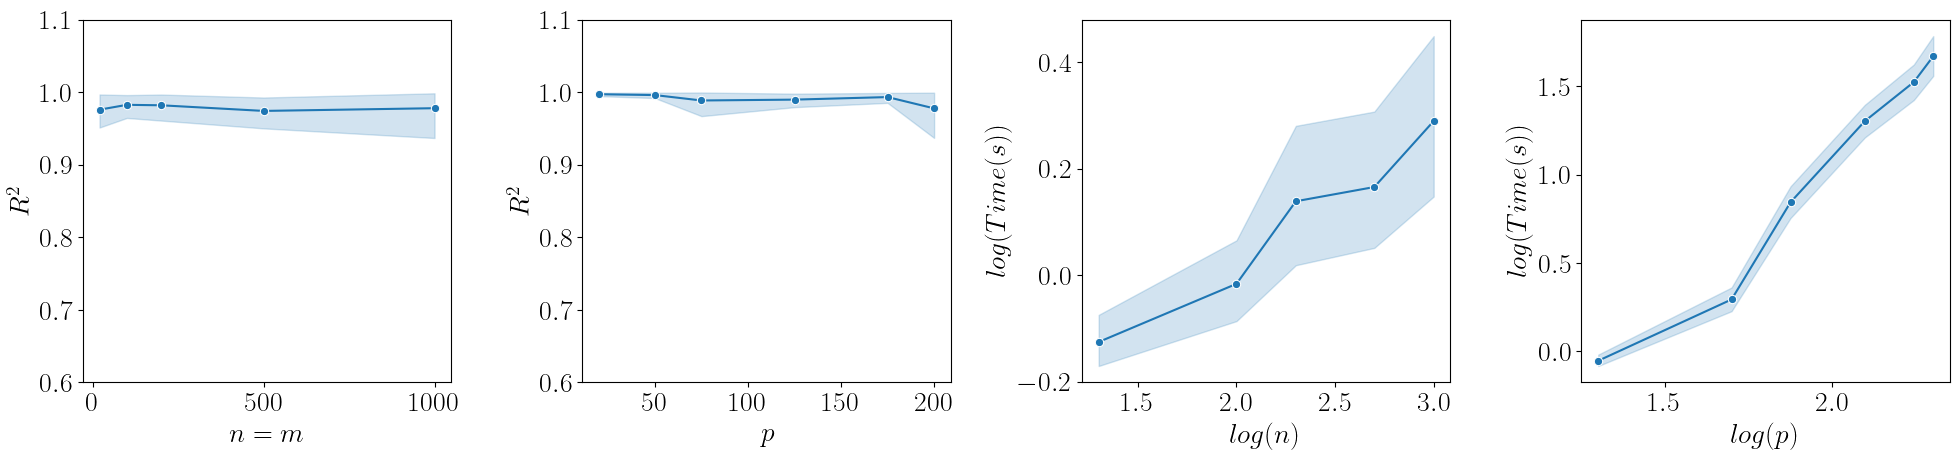

In [3]:
plt.figure(figsize=(20, 5))

plt.subplot(141)
sns.lineplot(data=results_df_sample_size, x="variable", y="value", marker="o")
plt.xlabel(r"$n = m$")
plt.ylabel(r"$R^2$")
plt.ylim(0.6, 1.1)

plt.subplot(142)
sns.lineplot(data=results_df_p, x="variable", y="value", marker="o")
plt.xlabel(r"$p$")
plt.ylabel(r"$R^2$")
plt.ylim(0.6, 1.1)

results_df_time['log_value'] = onp.log10(results_df_time['value'])
results_df_time['log_variable'] = onp.log10(results_df_time['variable'])

plt.subplot(143) # log(time) vs log(n)
sns.lineplot(data=results_df_time, x="log_variable", y="log_value", marker="o")
plt.xlabel(r"$log(n)$") # n=m
plt.ylabel(r"$log(Time (s))$")


results_df_p_time['log_value'] = onp.log10(results_df_p_time['value'])
results_df_p_time['log_variable'] = onp.log10(results_df_p_time['variable'])

plt.subplot(144) # log(time) vs log(p)
sns.lineplot(data=results_df_p_time, x="log_variable", y="log_value", marker="o")
plt.xlabel(r"$log(p)$")
plt.ylabel(r"$log(Time (s))$")

plt.tight_layout()
plt.savefig("./out/simulation_sample_size_p_rep50.png")
plt.show()